# Insurance Charges: Exploratory Data Analysis and Predictions with R
This project aims to perform a comprehensive exploratory data analysis on various variables related to insurance charges, examine their distributions, and correlations, and build a linear regression model to predict these charges accurately. Furthermore, we aim to improve the model's performance with up to 86% accuracy through various techniques.

## About Dataset
### Content
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

In [3]:
# Load library
library(tidyverse)
library(dplyr)
library(gplots)
library(ggplot2)

list.files(path = "../input")


character(0)

In [4]:
# Load data
df <- read_csv('insurance.csv')

Rows: 1338 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(df)

age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [6]:
# Change data type
df$sex <- as.factor(df$sex)
df$smoker <- as.factor(df$smoker)
df$region <- as.factor(df$region)
str(df)

spc_tbl_ [1,338 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 ...
 $ children: num [1:1338] 0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num [1:1338] 16885 1726 4449 21984 3867 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_character(),
  ..   bmi = col_double(),
  ..   children = col_double(),
  ..   smoker = col_character(),
  ..   region = col_character(),
  ..   charges = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


# Exploratory data analysis

In [7]:
# Get summary
summary(df)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

In [8]:
# Is any missing values?
sum(is.na(df))

[1] 0

## Age

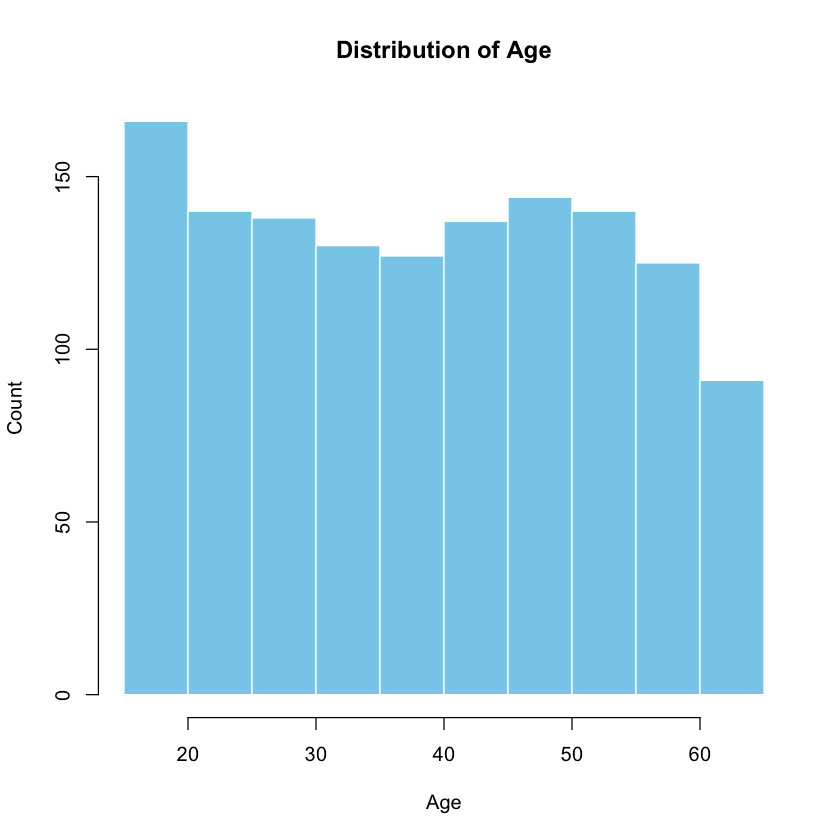

In [9]:
# Lets explore distribution of age in this dataset
hist(df$age, 
     main = "Distribution of Age",
     xlab = "Age",
     ylab = "Count",
     col = "skyblue",
     border = "white")

## Sex

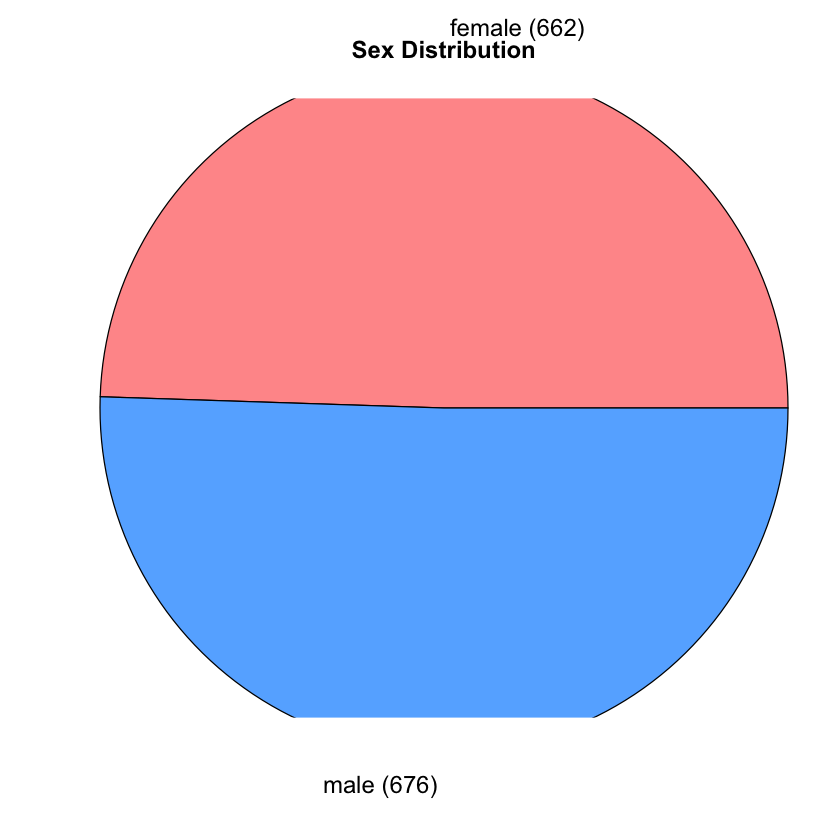

In [10]:
# Check sex distribution 
sex_counts <- table(df$sex)
colors <- c("#FF9999", "#66B2FF") 

pie(sex_counts, 
    main = "Sex Distribution",
    col = colors,
    labels = paste0(names(sex_counts), " (", sex_counts, ")"),
    cex = 1.2,
    radius = 1.2)


## BMI

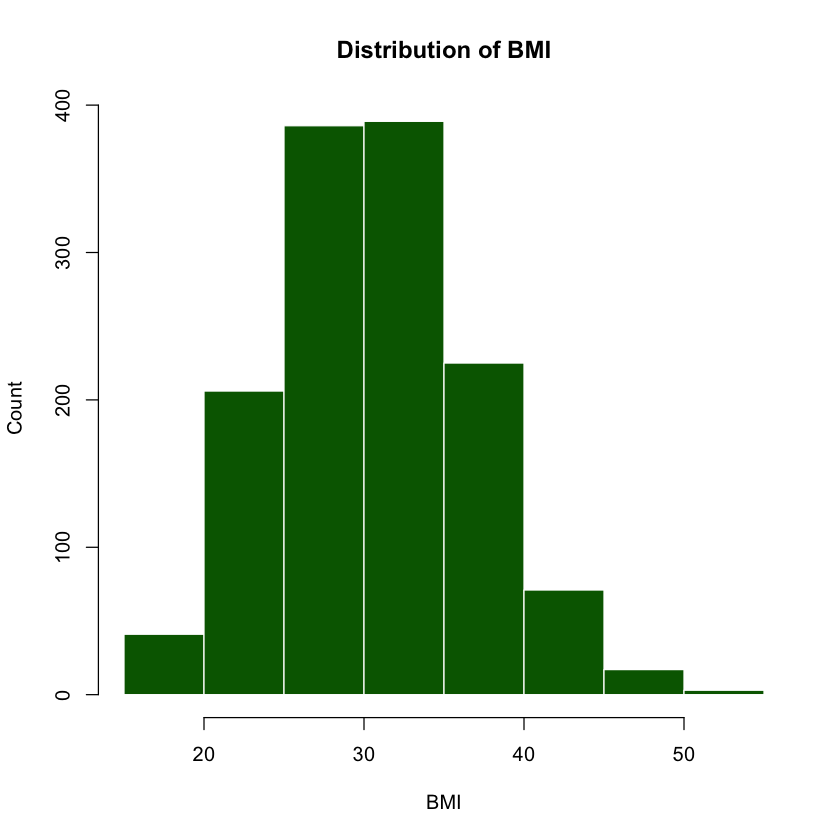

In [11]:
# Explore BMI
hist(df$bmi, 
     main = "Distribution of BMI",
     xlab = "BMI",
     ylab = "Count",
     col = "darkgreen",
     border = "white")

## Charges

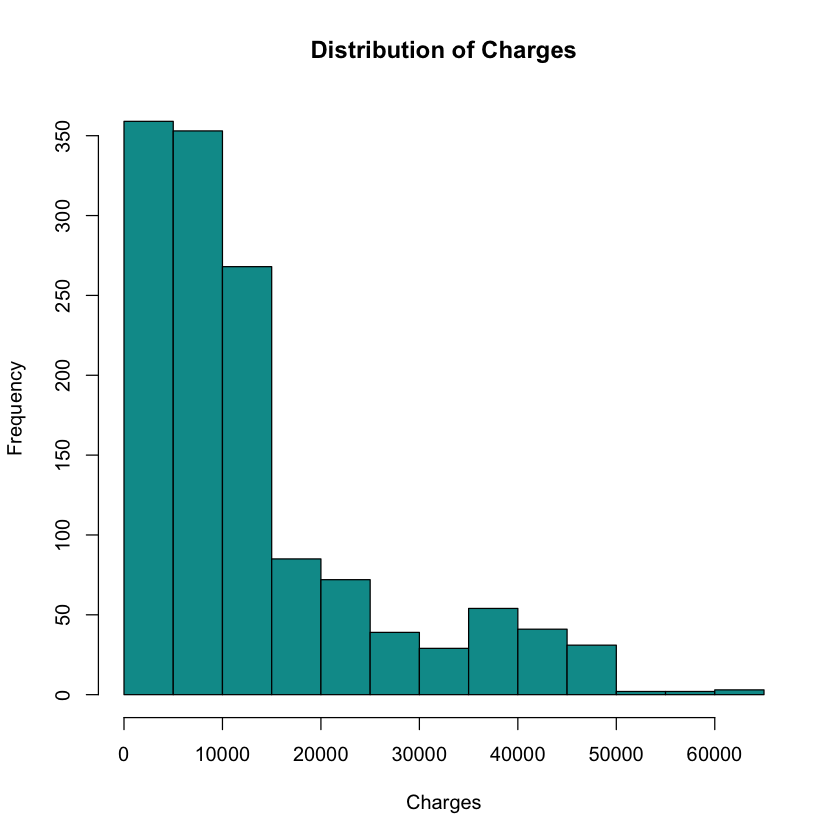

In [12]:
# Explore charges
hist(df$charges,
     main = "Distribution of Charges",
     xlab = "Charges",
     ylab = "Frequency",
     col = "#009999")

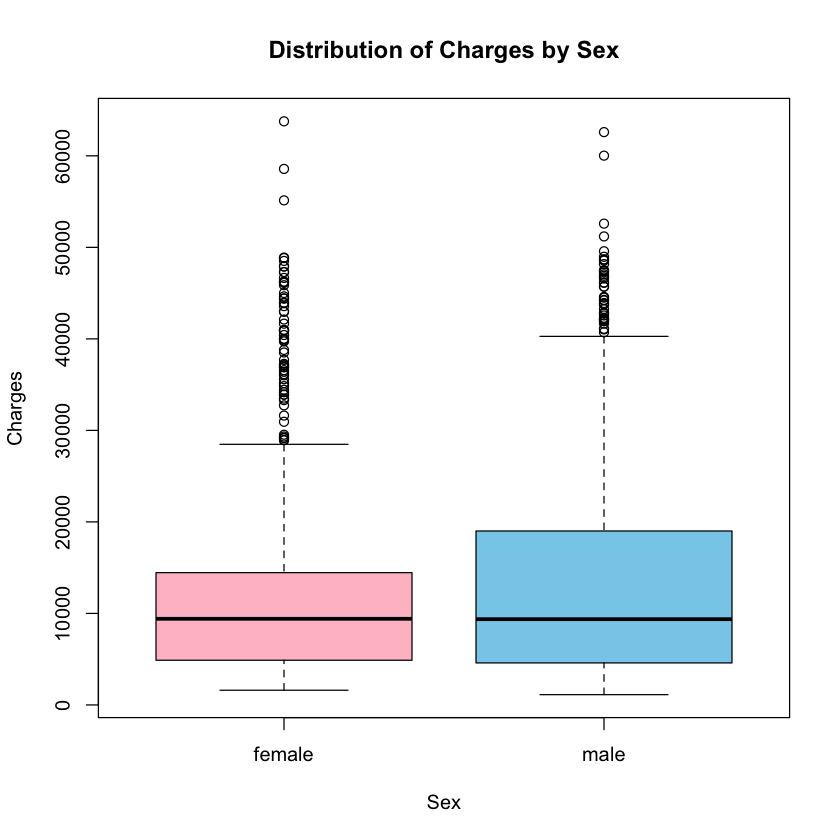

In [13]:
# Check distribution of charges by sex
boxplot(charges ~ sex, data = df,
        main = "Distribution of Charges by Sex",
        xlab = "Sex",
        ylab = "Charges",
        col = c("pink", "skyblue"))

In [14]:
# Average charges by sex
df %>% 
group_by(sex) %>% 
summarize(average_charges = mean(charges))


sex,average_charges
<fct>,<dbl>
female,12569.58
male,13956.75


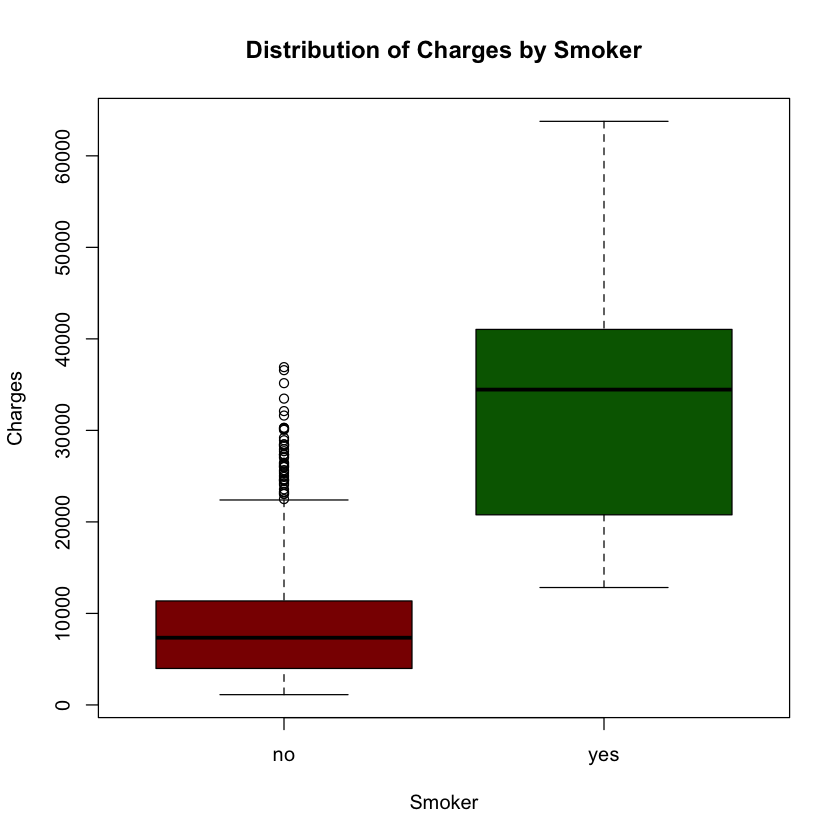

In [15]:
# Check distribution of charges by smoker
boxplot(charges ~ smoker, data = df,
        main = "Distribution of Charges by Smoker",
        xlab = "Smoker",
        ylab = "Charges",
        col = c("darkred", "darkgreen"))

In [16]:
# Average charges by smoker
df %>% 
group_by(smoker) %>% 
summarize(average_charges = mean(charges))

smoker,average_charges
<fct>,<dbl>
no,8434.268
yes,32050.232


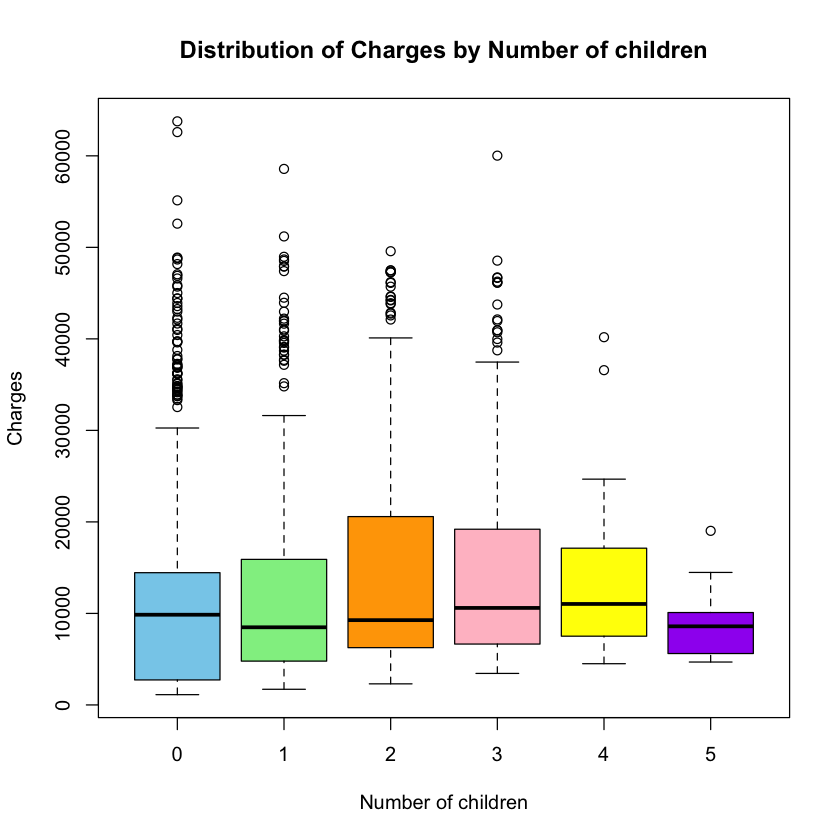

In [17]:
# Check distribution of charges by number of children
boxplot(charges ~ children, data = df,
        main = "Distribution of Charges by Number of children",
        xlab = "Number of children",
        ylab = "Charges",
       col = c("skyblue", "lightgreen", "orange", "pink", "yellow", 'purple'))

In [18]:
# Average charges by number of children
df %>% 
group_by(children) %>% 
summarize(average_charges = mean(charges)) %>%
arrange(desc(average_charges))

children,average_charges
<dbl>,<dbl>
3,15355.318
2,15073.564
4,13850.656
1,12731.172
0,12365.976
5,8786.035


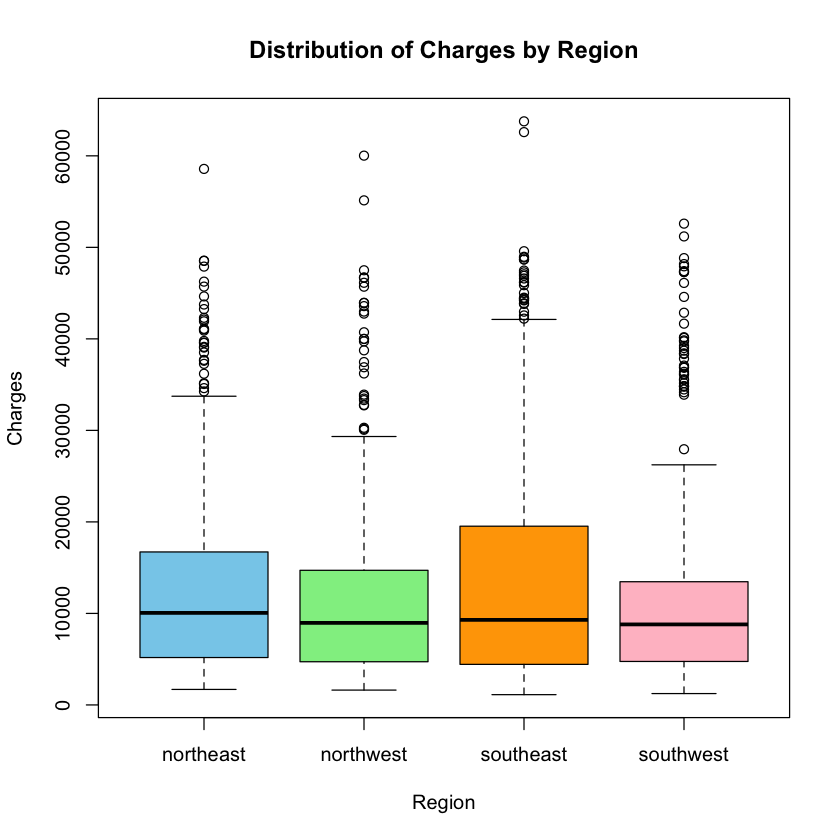

In [19]:
# Distribution of charges by region
boxplot(charges ~ region, data = df,
        main = "Distribution of Charges by Region",
        xlab = "Region",
        ylab = "Charges",
       col = c("skyblue", "lightgreen", "orange", "pink"))

In [20]:
# Average charges by region
df %>% 
group_by(region) %>% 
summarize(average_charges = mean(charges)) %>%
arrange(desc(average_charges))

region,average_charges
<fct>,<dbl>
southeast,14735.41
northeast,13406.38
northwest,12417.58
southwest,12346.94


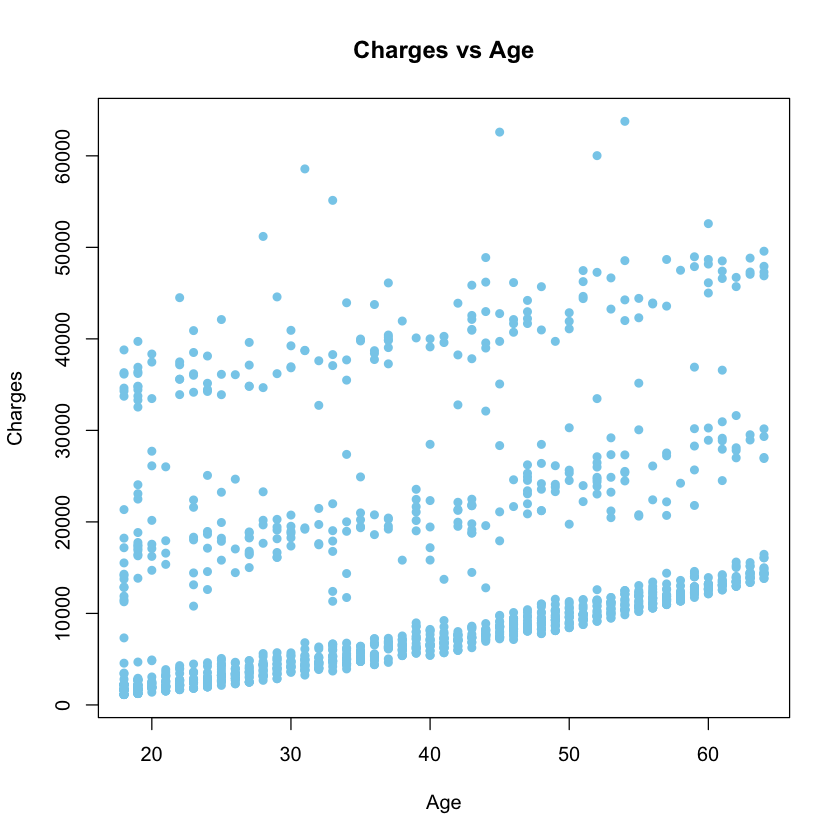

In [21]:
# Relationship between age and charges
plot(df$age, df$charges,
     main = "Charges vs Age",
     xlab = "Age",
     ylab = "Charges",
     col = "skyblue",
     pch = 16)

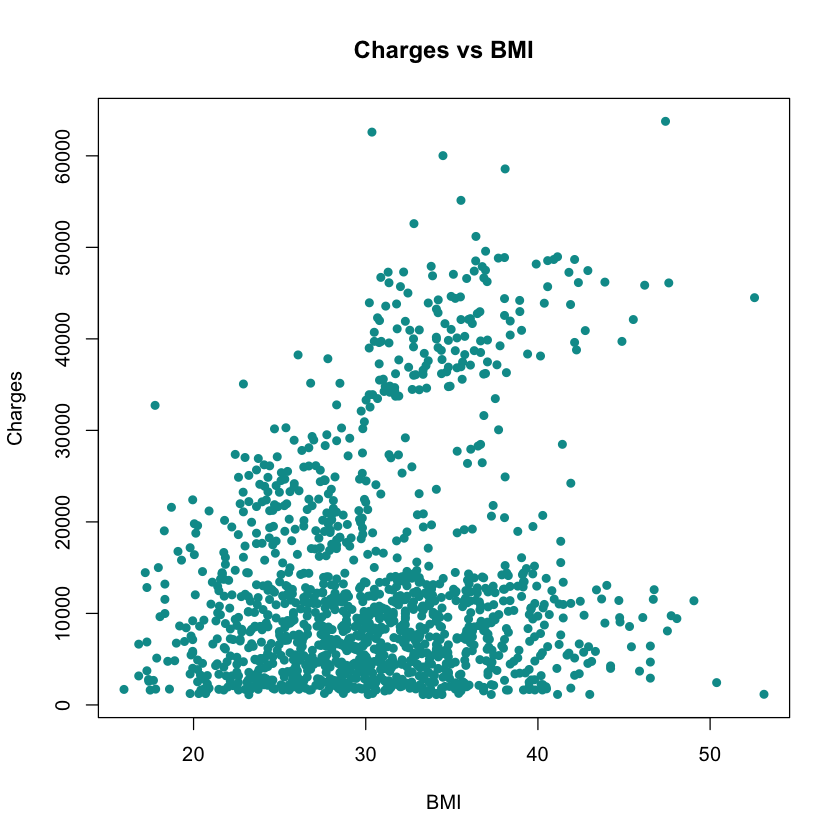

In [22]:
# Lets see relationships beetween BMI and charges
plot(df$bmi, df$charges,
     main = "Charges vs BMI",
     xlab = "BMI",
     ylab = "Charges",
     col = "#009999",
     pch = 16)

In [23]:
# Seems like obesity affect charges a lot. Lets create new column to investigate it
df$obese <- ifelse(df$bmi >= 30, "yes", "no")
df$obese <- as.factor(df$obese)
head(df)

age,sex,bmi,children,smoker,region,charges,obese
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
19,female,27.900,0,yes,southwest,16884.924,no
18,male,33.770,1,no,southeast,1725.552,yes
28,male,33.000,3,no,southeast,4449.462,yes
33,male,22.705,0,no,northwest,21984.471,no
32,male,28.880,0,no,northwest,3866.855,no
31,female,25.740,0,no,southeast,3756.622,no


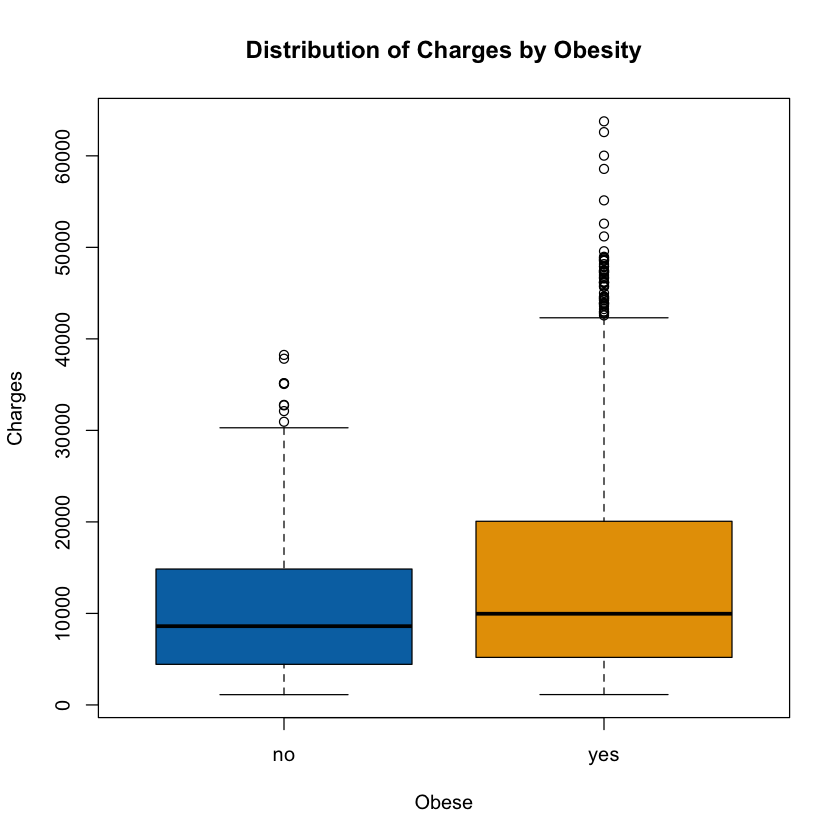

In [24]:
# Visualize obesity and charges
boxplot(charges ~ obese, data = df,
        main = "Distribution of Charges by Obesity",
        xlab = "Obese",
        ylab = "Charges",
       col = c("#0072B2", "#E69F00"))

In [25]:
# Average charges by obesity
df %>% 
group_by(obese) %>% 
summarize(average_charges = mean(charges))

obese,average_charges
<fct>,<dbl>
no,10713.67
yes,15552.34


## Correlation

In [26]:
# Create numeric dataframe
numeric_df <- df
numeric_df$sex <- as.numeric(numeric_df$sex)
numeric_df$smoker <- as.numeric(numeric_df$smoker)
numeric_df$region <- as.numeric(numeric_df$region)
numeric_df$obese <- as.numeric(numeric_df$obese)

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_df)
correlation_matrix

,age,sex,bmi,children,smoker,region,charges,obese
age,1.000000000,-0.020855872,0.109271882,0.042468999,-0.0250187515,0.002127313,0.299008193,0.0856683984
sex,-0.020855872,1.000000000,0.046371151,0.017162978,0.0761848169,0.004588385,0.057292062,0.0473172329
bmi,0.109271882,0.046371151,1.000000000,0.012758901,0.0037504259,0.157565849,0.198340969,0.7992106194
children,0.042468999,0.017162978,0.012758901,1.000000000,0.0076731203,0.016569446,0.067998227,0.0098066866
smoker,-0.025018752,0.076184817,0.003750426,0.007673120,1.0000000000,-0.002180682,0.787251430,0.0008096781
region,0.002127313,0.004588385,0.157565849,0.016569446,-0.0021806820,1.000000000,-0.006208235,0.1103479998
charges,0.299008193,0.057292062,0.198340969,0.067998227,0.7872514305,-0.006208235,1.000000000,0.1995317243
obese,0.085668398,0.047317233,0.799210619,0.009806687,0.0008096781,0.110348000,0.199531724,1.0000000000


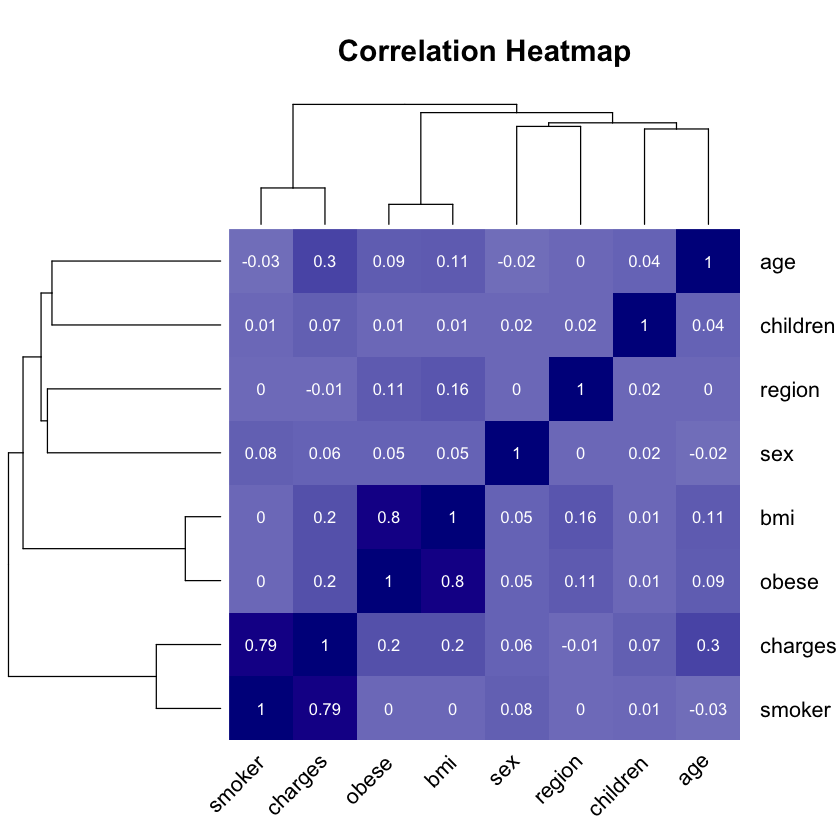

In [27]:
# Visualize the correlation
heatmap.2(correlation_matrix, 
          main = "Correlation Heatmap",
          col = colorRampPalette(c("white", "darkblue"))(100),
          key = FALSE,    
          symkey = FALSE,
          trace="none",
          cexCol = 1.3,    
          cexRow = 1.3,    
          srtCol = 45,      
          cellnote = round(correlation_matrix, 2),   
          notecol = "white",    
          notecex = 1)   

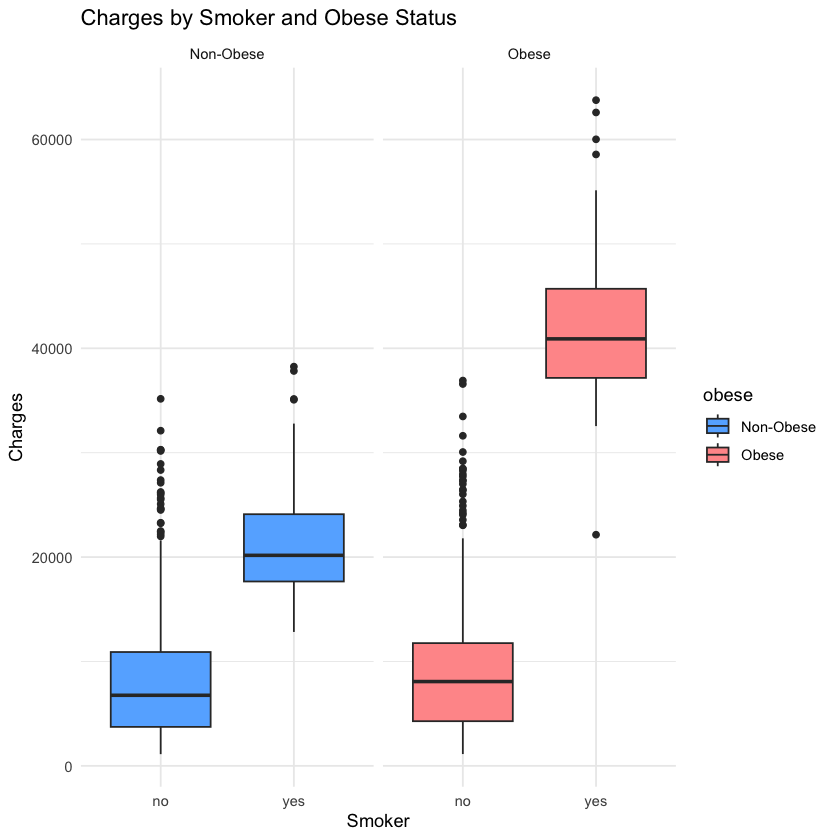

In [28]:
# As we can see smoking and obesity status significantly affect charges. Lets visualize charges by smoker and obesity
ggplot(df, aes(x = smoker, y = charges, fill = obese)) +
  geom_boxplot() +
  facet_grid(. ~ obese, labeller = labeller(obese = c("no" = "Non-Obese", "yes" = "Obese"))) +
  labs(title = "Charges by Smoker and Obese Status", x = "Smoker", y = "Charges") +
  scale_fill_manual(values = c("no" = "#66B2FF", "yes" = "#FF9999"), labels = c("Non-Obese", "Obese")) +
  theme_minimal()

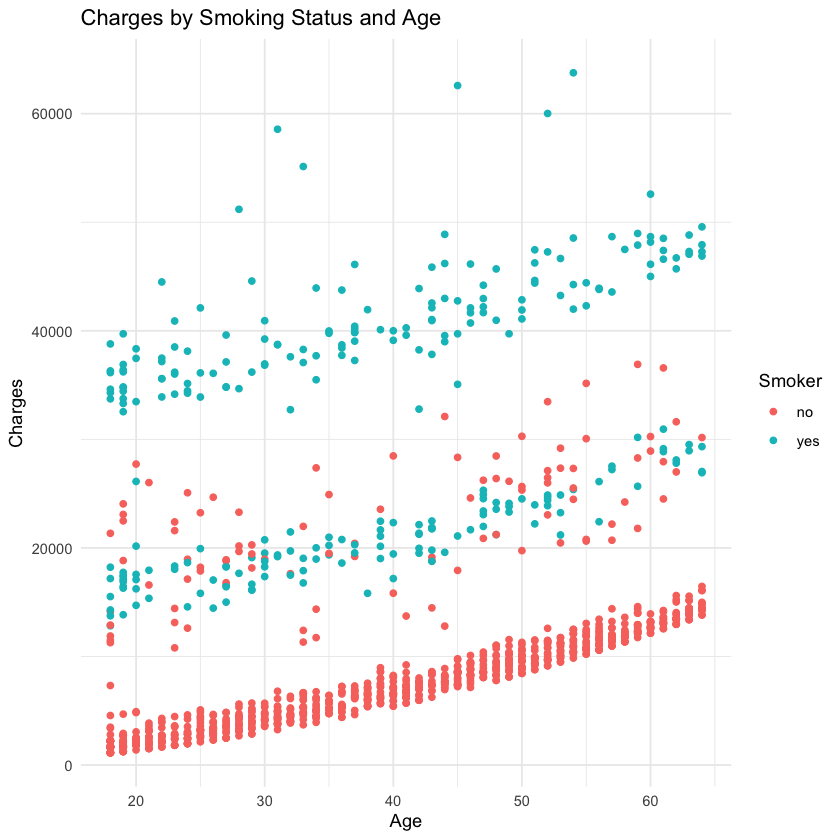

In [29]:
# Visualize relationship between charges, age and smoking status
ggplot(df, aes(x = age, y = charges, color = smoker)) +
  geom_point() +
  labs(title = "Charges by Smoking Status and Age", x = "Age", y = "Charges", color = "Smoker") +
  theme_minimal()

# Observations 
* Gender: Male policyholders tend to have higher charges compared to females.
* Age: Older customers generally have higher insurance charges compared to younger ones.
* Smoking Status: Smokers have significantly higher charges than non-smokers.
* BMI (Body Mass Index): There is a positive correlation between BMI and charges, indicating that higher BMI values are associated with higher insurance charges.
* Number of Children: Interestingly, policyholders with 0 and 5 children tend to have the lowest charges. On the other hand, those with 2 and 3 children have the highest charges. It's worth noting that the charges for families with 5 children may indicate a potential data error.
* Region: Customers in the Southeast and Northeast regions tend to have higher charges compared to those in the Northwest and Southwest regions.

* Correlation Analysis: According to the correlation matrix, the variables that have the most impact on charges are smoking status, age, obesity, and BMI. Customers who are both obese and smokers tend to have the highest charges.


# Charges prediction
In this section, we will use a linear regression model to predict insurance charges based on different variables. 

In [30]:
# Splitting the data into training and testing sets
set.seed(123)
train_indices <- sample(1:nrow(df), 0.8 * nrow(df))
train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

In [31]:
# Multiple linear regression to predict charges using all variables from dataset
model1 <- lm(charges ~ sex + age + children + bmi + obese + smoker + region, data = train_data)
summary(model1)


Call:
lm(formula = charges ~ sex + age + children + bmi + obese + smoker + 
    region, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12278.5  -3419.9   -168.7   1768.5  28270.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7799.70    1453.80  -5.365 9.94e-08 ***
sexmale          -231.32     375.02  -0.617  0.53749    
age               243.67      13.52  18.018  < 2e-16 ***
children          558.97     154.83   3.610  0.00032 ***
bmi               168.15      52.09   3.228  0.00129 ** 
obeseyes         2822.09     616.82   4.575 5.32e-06 ***
smokeryes       24189.09     455.72  53.078  < 2e-16 ***
regionnorthwest  -623.22     534.78  -1.165  0.24413    
regionsoutheast  -728.30     537.44  -1.355  0.17566    
regionsouthwest -1032.17     537.13  -1.922  0.05492 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6088 on 1060 degrees of freedom
Multiple R-squared:  

In [32]:
# Lets remove variables that do not affect charges much and add interaction between smoking status and obesity since as we saw before, they have the biggest impact on charges

model2 <- lm(charges ~ age + bmi + obese*smoker, data = train_data)
summary(model2)


Call:
lm(formula = charges ~ age + bmi + obese * smoker, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19775.2  -1981.2  -1209.4   -322.7  24346.5 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -4689.88    1050.71  -4.464 8.92e-06 ***
age                  260.71      10.17  25.638  < 2e-16 ***
bmi                  109.34      38.02   2.876  0.00411 ** 
obeseyes           -1007.21     480.51  -2.096  0.03631 *  
smokeryes          13509.99     502.40  26.891  < 2e-16 ***
obeseyes:smokeryes 19876.41     686.19  28.967  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4580 on 1064 degrees of freedom
Multiple R-squared:  0.8626,	Adjusted R-squared:  0.8619 
F-statistic:  1336 on 5 and 1064 DF,  p-value: < 2.2e-16


In [33]:
# Predicting charges on the test data
predictions_model1<- predict(model1, newdata = test_data)
predictions_model2 <- predict(model2, newdata = test_data)

# Evaluate the models
# RMSE
mse_model1 <- mean((test_data$charges - predictions_model1)^2)
rmse_model1 <- sqrt(mse_model1)

mse_model2 <- mean((test_data$charges - predictions_model2)^2)
rmse_model2 <- sqrt(mse_model2)

rmse_model1
rmse_model2

[1] 5700.871

[1] 4434.344

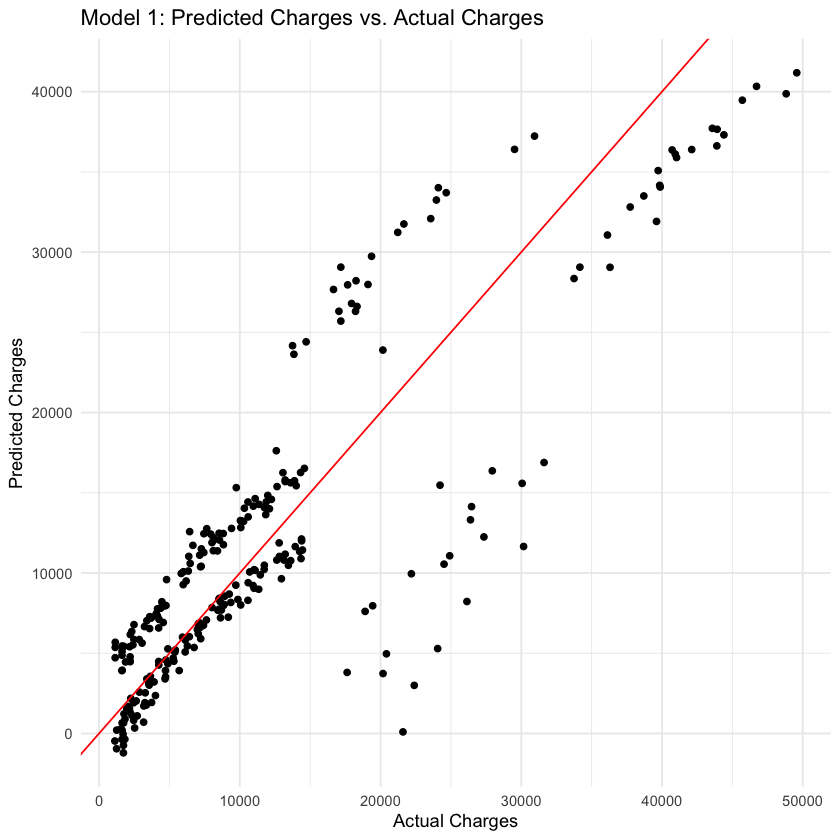

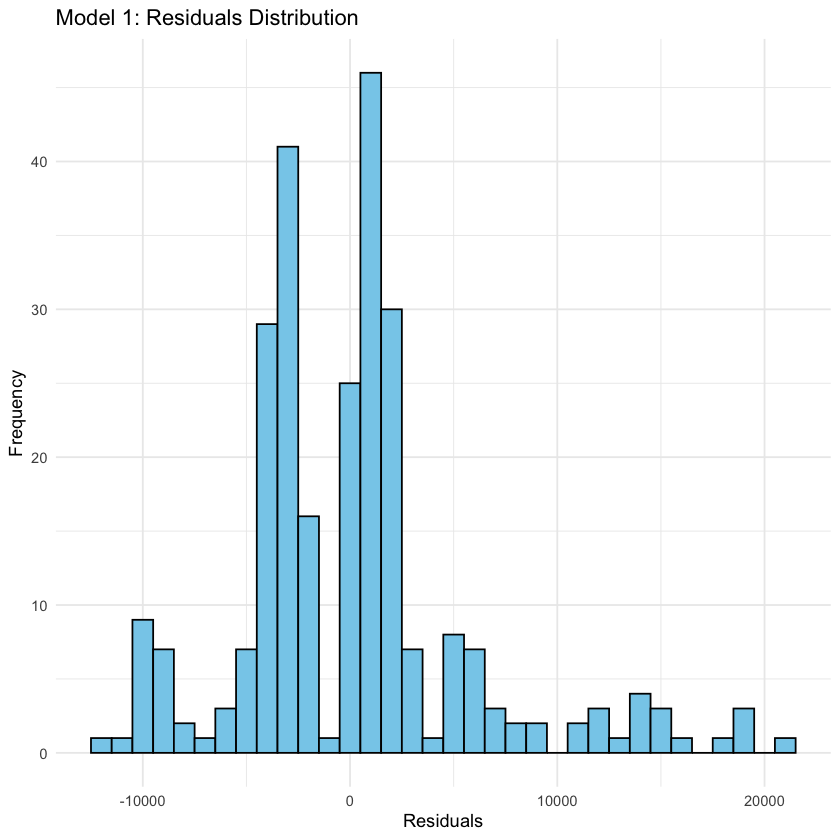

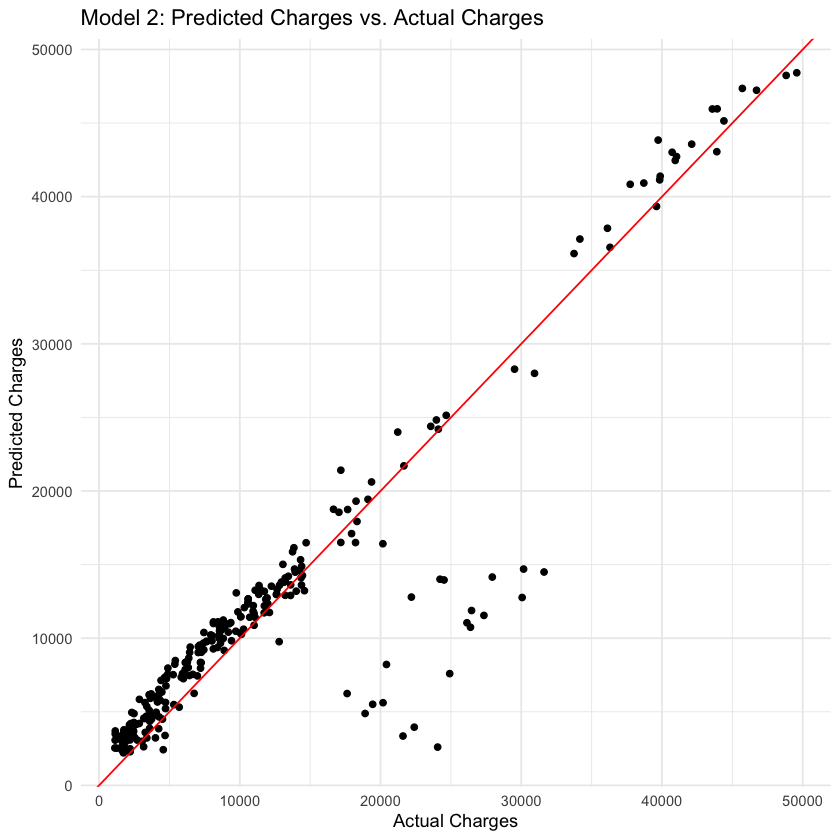

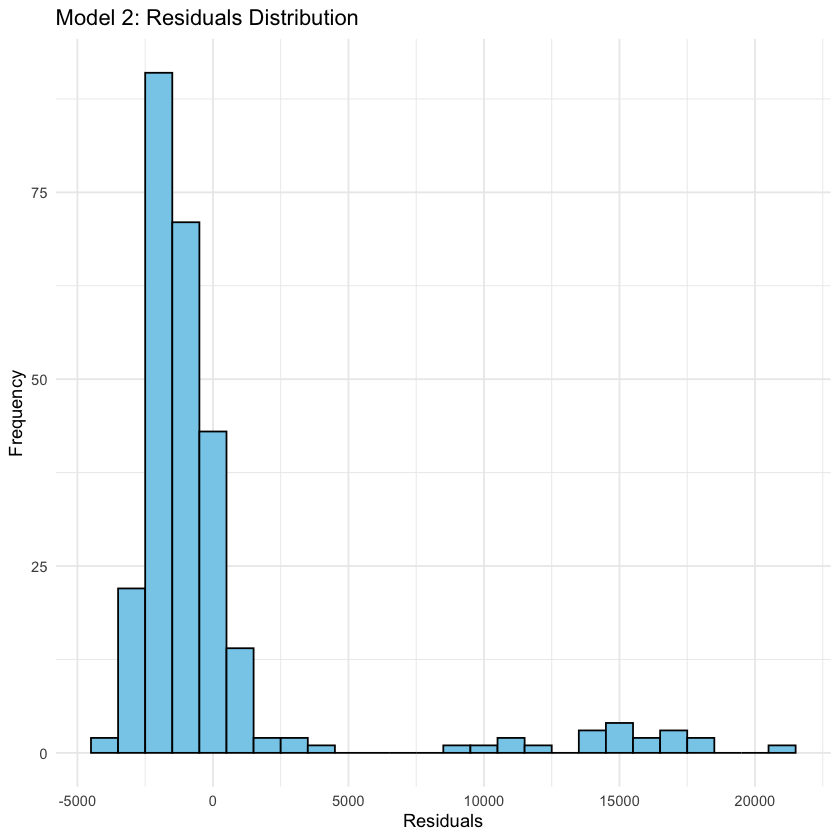

In [34]:
# Create a scatter plot of predicted charges vs. actual charges
ggplot(test_data, aes(x = charges, y = predictions_model1)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(x = "Actual Charges", y = "Predicted Charges",
       title = "Model 1: Predicted Charges vs. Actual Charges") +
  theme_minimal()

# Assess the residuals' distribution
residuals_model1 <- test_data$charges - predictions_model1
ggplot(data.frame(residuals = residuals_model1), aes(x = residuals)) +
  geom_histogram(binwidth = 1000, fill = "skyblue", color = "black") +
  labs(x = "Residuals", y = "Frequency",
       title = "Model 1: Residuals Distribution") +
  theme_minimal()

# Create a scatter plot of predicted charges vs. actual charges
ggplot(test_data, aes(x = charges, y = predictions_model2)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(x = "Actual Charges", y = "Predicted Charges",
       title = "Model 2: Predicted Charges vs. Actual Charges") +
  theme_minimal()

# Assess the residuals' distribution
residuals_model2 <- test_data$charges - predictions_model2
ggplot(data.frame(residuals = residuals_model2), aes(x = residuals)) +
  geom_histogram(binwidth = 1000, fill = "skyblue", color = "black") +
  labs(x = "Residuals", y = "Frequency",
       title = "Model 2: Residuals Distribution") +
  theme_minimal()


# Conclusion
Model 1 has only 75% accuracy and a root mean squared error of 5700, indicating its moderate performance in estimating insurance charges. 

We improved the performance of this model by removing unnecessary variables and adding interaction between smoking and obese status. 

As a result, model 2 achieved 86% accuracy and a root mean squared error of 4434. This refined model demonstrates its potential for more accurate predictions of insurance charges.

### Thank you for reading!